![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/24.3.Comparison_Medical_Text_Summarization.ipynb)

# Medical Text Summarization Comparison
## Spark NLP for Healthcare vs Other SOTA Models

In [ ]:
!pip install -q transformers
!pip install -q sentencepiece
!pip install -q git+https://github.com/Tiiiger/bert_score

In [ ]:
radiology_text = '''
INDICATIONS: Peripheral vascular disease with claudication.

RIGHT:
1. Normal arterial imaging of right lower extremity.
2. Peak systolic velocity is normal.
3. Arterial waveform is triphasic.
4. Ankle brachial index is 0.96.

LEFT:
1. Normal arterial imaging of left lower extremity.

2. Peak systolic velocity is normal.
3. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic.
4. Ankle brachial index is 1.06.

IMPRESSION:
Normal arterial imaging of both lower extremities.
'''

print (radiology_text)


INDICATIONS: Peripheral vascular disease with claudication.

RIGHT:
1. Normal arterial imaging of right lower extremity.
2. Peak systolic velocity is normal.
3. Arterial waveform is triphasic.
4. Ankle brachial index is 0.96.

LEFT:
1. Normal arterial imaging of left lower extremity.

2. Peak systolic velocity is normal.
3. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic.
4. Ankle brachial index is 1.06.

IMPRESSION:
Normal arterial imaging of both lower extremities.



In [ ]:

clinical_text = """ Patient with hypertension, syncope, and spinal stenosis - for recheck.
 (Medical Transcription Sample Report)

 SUBJECTIVE:
 The patient is a 78-year-old female who returns for recheck. She has hypertension. She denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema.

 PAST MEDICAL HISTORY / SURGERY / HOSPITALIZATIONS:
 Reviewed and unchanged from the dictation on 12/03/2003.

 MEDICATIONS:
 Atenolol 50 mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin as needed, and TriViFlor 25 mg two pills daily. She also has Elocon cream 0.1% and Synalar cream 0.01% that she uses as needed for rash."""

print (clinical_text)


 Patient with hypertension, syncope, and spinal stenosis - for recheck.
 (Medical Transcription Sample Report)

 SUBJECTIVE:
 The patient is a 78-year-old female who returns for recheck. She has hypertension. She denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema.

 PAST MEDICAL HISTORY / SURGERY / HOSPITALIZATIONS:
 Reviewed and unchanged from the dictation on 12/03/2003.

 MEDICATIONS:
 Atenolol 50 mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin as needed, and TriViFlor 25 mg two pills daily. She also has Elocon cream 0.1% and Synalar cream 0.01% that she uses as needed for rash.


In [ ]:
summary_dict = {"flan-t5-base-samsum":{'radiology_text':'',
                                      'clinical_text':''},
                "flan-t5-base":{'radiology_text':'',
                                      'clinical_text':''},
                "bart-large-samsum":{'radiology_text':'',
                                      'clinical_text':''},
                "pegasus-samsum":{'radiology_text':'',
                                      'clinical_text':''},
                "pegasus-xsum":{'radiology_text':'',
                                      'clinical_text':''},
                "bart-large-samsum":{'radiology_text':'',
                                      'clinical_text':''},
                "bart-large-cnn-samsum":{'radiology_text':'',
                                      'clinical_text':''}
               }

## Flan-T5-base-samsum


- model_name = "philschmid/flan-t5-base-samsum"
- model_size = 250M
- base_model = flan-t5
- dataset = samsum
- domain = general
- owner = google (fine-tuned)
- code_availibilty = fine tunning code is not available
- checkpoints_availaibility = Available
- link_to_repo = https://huggingface.co/philschmid/flan-t5-base-samsum/tree/main

Reported metrics
- Loss: 1.3716
- Rouge1: 47.2358
- Rouge2: 23.5135
- Rougel: 39.6266
- Rougelsum: 43.3458
- Gen Len: 17.3907

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("philschmid/flan-t5-base-samsum")
model = T5ForConditionalGeneration.from_pretrained("philschmid/flan-t5-base-samsum")

In [ ]:
def get_summary (model, text):

    input_ids = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True).input_ids
    outputs = model.generate(input_ids,  max_length=512)
    res = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return res

In [ ]:
summary_dict['flan-t5-base-samsum']['radiology_text'] = get_summary(model, "summarize:"+radiology_text)
summary_dict['flan-t5-base-samsum']['radiology_text']

'RIGHT: 1. Normal arterial imaging of right lower extremity. 2. Peak systolic velocity is normal. 3. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. 4. Ankle brachial index is 1.06. IMPRESSION: Normal arterial imaging of both lower extremities.'

In [ ]:
summary_dict['flan-t5-base-samsum']['clinical_text'] = get_summary(model, "summarize:"+clinical_text)
summary_dict['flan-t5-base-samsum']['clinical_text']

'A patient with hypertension, syncope, and spinal stenosis for recheck.'

## Flan-T5-base

- model_name = "google/flan-t5-base"
- model_size = 250M
- base_model = flan-t5
- domain = general
- owner = google
- checkpoints_availaibility = Available
- link_to_repo = https://huggingface.co/google/flan-t5-base


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

In [ ]:
summary_dict['flan-t5-base']['radiology_text'] = get_summary(model, "summarize:"+radiology_text)
summary_dict['flan-t5-base']['radiology_text']

'RIGHT: 1. Normal arterial imaging of right lower extremity. 2. Peak systolic velocity is normal. 3. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. 4. Ankle brachial index is 0.06'

In [ ]:
summary_dict['flan-t5-base']['clinical_text'] = get_summary(model, "summarize:"+clinical_text)
summary_dict['flan-t5-base']['clinical_text']

'- recheck of a patient with hypertension, syncope, and spinal stenosis'

## Pegasus-xsum

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

In [ ]:
summary_dict['pegasus-xsum']['radiology_text'] =  get_summary(model, radiology_text)
summary_dict['pegasus-xsum']['radiology_text']

'Arterial imaging of both lower extremities.'

In [ ]:
summary_dict['pegasus-xsum']['clinical_text'] = get_summary(model, clinical_text)
summary_dict['pegasus-xsum']['clinical_text']

'A case report of a 78-year-old woman with hypertension, syncope, and spinal stenosis.'

## Pegasus Samsum

- model_name = transformersbook/pegasus-samsum
- model_size = 570M
- base_model = google/pegasus-cnn_dailymail
- dataset = samsum
- domain = general
- owner = google (fine-tunned)
- code_availibilty = https://github.com/nlp-with-transformers/notebooks/blob/main/06_summarization.ipynb
- checkpoints_availaibility = Available
- link_to_repo = https://github.com/nlp-with-transformers/notebooks/blob/main/06_summarization.ipynb

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

tokenizer = AutoTokenizer.from_pretrained("transformersbook/pegasus-samsum")
model = AutoModelForSeq2SeqLM.from_pretrained("transformersbook/pegasus-samsum")


In [ ]:
summary_dict['pegasus-samsum']['radiology_text'] = get_summary(model, radiology_text)
summary_dict['pegasus-samsum']['radiology_text']

'Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. IMPRESSION: Normal arterial imaging of both lower extremities.'

In [ ]:
summary_dict['pegasus-samsum']['clinical_text'] = get_summary(model, clinical_text)
summary_dict['pegasus-samsum']['clinical_text']

'The patient is a 78-year-old female who returns for recheck. She has hypertension. She denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema. She has Atenolol 50 mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin as needed, and TriViFlor 25 mg two pills daily.'

## Bart-large-samsum

- model_name = linydub/bart-large-samsum
- model_size = 500M
- base_model = facebook/bart-large
- dataset = samsum
- domain = general
- owner = facebook (fine-tuned)
- code_availibilty = fine tunning code is not available
- checkpoints_availaibility = https://huggingface.co/linydub/bart-large-samsum
- link_to_repo = https://github.com/linydub/azureml-greenai-txtsum

Reported metrics
- eval_rouge1	55.0234
- eval_rouge2	29.6005
- eval_rougeL	44.914
- eval_rougeLsum	50.464
- predict_rouge1	53.4345
- predict_rouge2	28.7445
- predict_rougeL	44.1848
- predict_rougeLsum	49.1874

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization", model="linydub/bart-large-samsum")

In [ ]:
summary_dict['bart-large-samsum']['radiology_text'] = summarizer(radiology_text)[0]['summary_text']
summary_dict['bart-large-samsum']['radiology_text']

'Peripheral vascular disease with claudication. Arterial waveform is triphasic. Peak systolic velocity is normal. Ankle brachial index is 1.06.'

In [ ]:
summary_dict['bart-large-samsum']['clinical_text'] = summarizer(clinical_text)[0]['summary_text']
summary_dict['bart-large-samsum']['clinical_text']

'A 78-year-old female with hypertension, syncope, and spinal stenosis has returned for recheck. She has Atenolol 50 mg daily, Premarin 0.625 mg daily. She also has Elocon cream 0.1% and Synalar cream'

## Bart-large-cnn-samsum

- model_name = philschmid/bart-large-cnn-samsum
- model_size = 500M
- base_model = facebook/bart-large
- dataset = samsum
- domain = general
- owner = facebook (fine-tuned)
- code_availibilty = fine tunning code is not available
- checkpoints_availaibility = Available
- link_to_repo = https://huggingface.co/philschmid/bart-large-cnn-samsum

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

tokenizer = BartTokenizer.from_pretrained('philschmid/bart-large-cnn-samsum')
model = BartForConditionalGeneration.from_pretrained('philschmid/bart-large-cnn-samsum')


In [ ]:
summary_dict['bart-large-cnn-samsum']['radiology_text'] = get_summary(model, radiology_text)
summary_dict['bart-large-cnn-samsum']['radiology_text']

'Peripheral vascular disease with claudication. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. Ankle brachial index is 1.06.    IMAGINATION: Normal arterial imaging of both lower extremities.'

In [ ]:
summary_dict['bart-large-cnn-samsum']['clinical_text'] = get_summary(model, clinical_text)
summary_dict['bart-large-cnn-samsum']['clinical_text']

'The patient is a 78-year-old female with hypertension, syncope, and spinal stenosis. She has Atenolol 50mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin as needed, and TriViFlor 25 mg two pills daily.'

# Spark NLP for Healthcare

📌To run this yourself, you will need to upload your license keys to the notebook. Just Run The Cell Below in order to do that. Also You can open the file explorer on the left side of the screen and upload `license_keys.json` to the folder that opens.
Otherwise, you can look at the example outputs at the bottom of the notebook.

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs==5.1.0

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, medical

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.install()

In [ ]:
from johnsnowlabs import nlp, medical
import pandas as pd

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

In [ ]:
from pyspark.sql import DataFrame
import pyspark.sql.functions as F
import pyspark.sql.types as T
import pyspark.sql as SQL
from pyspark import keyword_only
import string
import numpy as np
import pandas as pd


## summarizer_clinical_jsl_augmented

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("documents")

med_summarizer = medical.Summarizer\
    .pretrained("summarizer_clinical_jsl_augmented", 'en', 'clinical/models')\
    .setInputCols(["documents"])\
    .setMaxTextLength(1024)\
    .setMaxNewTokens(256)\
    .setOutputCol("summary")

pipeline = nlp.Pipeline(stages=[document_assembler, med_summarizer])

empty_data = spark.createDataFrame([['']]).toDF("text")

lp_pipeline_aug = nlp.LightPipeline(pipeline.fit(empty_data))

summarizer_clinical_jsl_augmented download started this may take some time.
[OK!]


In [ ]:
summary_dict['sparknlp_aug'] = {}

In [ ]:
summary_dict['sparknlp_slim'] = {}

In [ ]:

summary_dict['sparknlp_aug']['radiology_text']  = lp_pipeline_aug.annotate(radiology_text)['summary'][0]
summary_dict['sparknlp_aug']['radiology_text']

'The patient has peripheral vascular disease with claudication and underwent normal arterial imaging of both lower extremities. The right lower extremity showed normal arterial imaging with normal peak systolic velocity, triphasic arterial waveform, and ankle brachial index of 0.96. The left lower extremity showed normal arterial imaging with triphasic arterial waveform except for the posterior tibial artery where it was biphasic. The ankle brachial index was 0.06.'

In [ ]:
summary_dict['sparknlp_aug']['clinical_text'] = lp_pipeline_aug.annotate(clinical_text)['summary'][0]
summary_dict['sparknlp_aug']['clinical_text']

'A 78-year-old female with hypertension, syncope, and spinal stenosis returns for a recheck. She denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema. Her medications include Atenolol, Premarin, calcium with vitamin D, multivitamin, aspirin, and TriViFlor. She also has Elocon cream and Synalar cream for rash.'

## summarizer_clinical_jsl

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("documents")

med_summarizer = medical.Summarizer\
    .pretrained("summarizer_clinical_jsl", 'en', 'clinical/models')\
    .setInputCols(["documents"])\
    .setMaxTextLength(1024)\
    .setMaxNewTokens(256)\
    .setOutputCol("summary")

pipeline = nlp.Pipeline(stages=[document_assembler, med_summarizer])

empty_data = spark.createDataFrame([['']]).toDF("text")

lp_pipeline = nlp.LightPipeline(pipeline.fit(empty_data))

summarizer_clinical_jsl download started this may take some time.
[OK!]


In [ ]:
summary_dict['sparknlp_slim']['radiology_text']  = lp_pipeline.annotate(radiology_text)['summary'][0]
summary_dict['sparknlp_slim']['radiology_text']

'The patient has peripheral vascular disease with claudication and underwent normal arterial imaging of both lower extremities. The peak systolic velocity is normal, but the arterial waveform is triphasic throughout, except for the posterior tibial artery where it is biphasic. The ankle brachial index is 0.06. The impression is that the arterial imaging of both lower extremities is normal.'

In [ ]:
summary_dict['sparknlp_slim']['clinical_text']  = lp_pipeline.annotate(clinical_text)['summary'][0]
summary_dict['sparknlp_slim']['clinical_text']

'A 78-year-old female with hypertension, syncope, and spinal stenosis returns for recheck. She denies chest pain, palpations, orthopnea, nocturnal dyspnea, or edema. She is on multiple medications and has Elocon cream and Synalar cream for rash.'

## Comparison

In [ ]:
summary_dict['original'] = {'clinical_text':clinical_text,
                            'radiology_text':radiology_text}

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.options.display.max_colwidth = 600

In [ ]:
df = pd.DataFrame(summary_dict)
df.columns

Index(['flan-t5-base-samsum', 'flan-t5-base', 'bart-large-samsum',
       'pegasus-samsum', 'pegasus-xsum', 'bart-large-cnn-samsum',
       'sparknlp_aug', 'sparknlp_slim', 'original'],
      dtype='object')

In [ ]:
df[['original','flan-t5-base-samsum', 'flan-t5-base', 'bart-large-samsum',
       'pegasus-samsum', 'pegasus-xsum', 'bart-large-cnn-samsum', 'sparknlp_aug', 'sparknlp_slim'
       ]]

,original,flan-t5-base-samsum,flan-t5-base,bart-large-samsum,pegasus-samsum,pegasus-xsum,bart-large-cnn-samsum,sparknlp_aug,sparknlp_slim
radiology_text,\nINDICATIONS: Peripheral vascular disease with claudication.\n\nRIGHT:\n1. Normal arterial imaging of right lower extremity.\n2. Peak systolic velocity is normal.\n3. Arterial waveform is triphasic.\n4. Ankle brachial index is 0.96.\n\nLEFT:\n1. Normal arterial imaging of left lower extremity.\n\n2. Peak systolic velocity is normal.\n3. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic.\n4. Ankle brachial index is 1.06.\n\nIMPRESSION:\nNormal arterial imaging of both lower extremities.\n,RIGHT: 1. Normal arterial imaging of right lower extremity. 2. Peak systolic velocity is normal. 3. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. 4. Ankle brachial index is 1.06. IMPRESSION: Normal arterial imaging of both lower extremities.,RIGHT: 1. Normal arterial imaging of right lower extremity. 2. Peak systolic velocity is normal. 3. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. 4. Ankle brachial index is 0.06,Peripheral vascular disease with claudication. Arterial waveform is triphasic. Peak systolic velocity is normal. Ankle brachial index is 1.06.,Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. IMPRESSION: Normal arterial imaging of both lower extremities.,Arterial imaging of both lower extremities.,Peripheral vascular disease with claudication. Arterial waveform is triphasic throughout except in posterior tibial artery where it is biphasic. Ankle brachial index is 1.06. IMAGINATION: Normal arterial imaging of both lower extremities.,"The patient has peripheral vascular disease with claudication and underwent normal arterial imaging of both lower extremities. The right lower extremity showed normal arterial imaging with normal peak systolic velocity, triphasic arterial waveform, and ankle brachial index of 0.96. The left lower extremity showed normal arterial imaging with triphasic arterial waveform except for the posterior tibial artery where it was biphasic. The ankle brachial index was 0.06.","The patient has peripheral vascular disease with claudication and underwent normal arterial imaging of both lower extremities. The peak systolic velocity is normal, but the arterial waveform is triphasic throughout, except for the posterior tibial artery where it is biphasic. The ankle brachial index is 0.06. The impression is that the arterial imaging of both lower extremities is normal."
clinical_text,"Patient with hypertension, syncope, and spinal stenosis - for recheck.\n (Medical Transcription Sample Report)\n\n SUBJECTIVE:\n The patient is a 78-year-old female who returns for recheck. She has hypertension. She denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema.\n\n PAST MEDICAL HISTORY / SURGERY / HOSPITALIZATIONS:\n Reviewed and unchanged from the dictation on 12/03/2003.\n\n MEDICATIONS:\n Atenolol 50 mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin as needed, and TriViFlor 25 mg two ...","A patient with hypertension, syncope, and spinal stenosis for recheck.","- recheck of a patient with hypertension, syncope, and spinal stenosis","A 78-year-old female with hypertension, syncope, and spinal stenosis has returned for recheck. She has Atenolol 50 mg daily, Premarin 0.625 mg daily. She also has Elocon cream 0.1% and Synalar cream","The patient is a 78-year-old female who returns for recheck. She has hypertension. She denies difficulty with chest pain, palpations, orthopnea, nocturnal dyspnea, or edema. She has Atenolol 50 mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin as needed, and TriViFlor 25 mg two pills daily.","A case repo

In [ ]:
import json

with open ('summariozation_metrics_comparison.json', 'w') as f:
    json.dump(summary_dict, f)

In [ ]:
import nltk
from bert_score import score

def generate_scores(res, ref):

    berts_p, berts_r, berts_f = score([res], [ref], lang="en", return_hash=False)
    berts_p, berts_r, berts_f = round(float(berts_p[0]), 4), round(float(berts_r[0]), 4), round(float(berts_f[0]), 4)

    print('BERT Score Precision:', berts_p)
    print('BERT Score Recall:', berts_r)
    print('BERT Score F1:', berts_f)


### Summarization with GPT-4

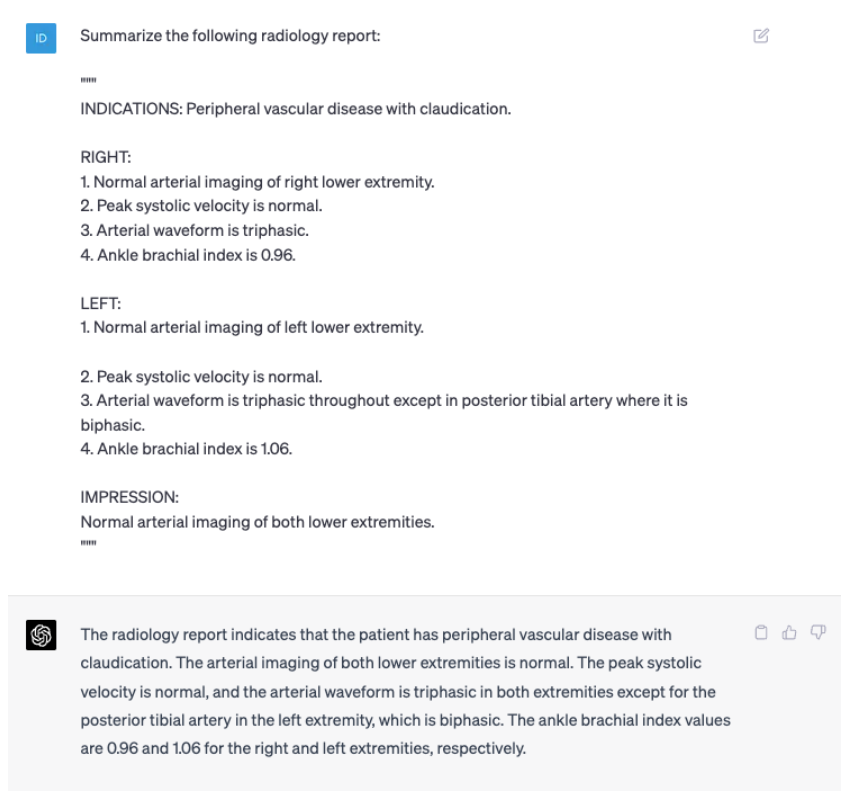

In [ ]:
radiology_summary_gpt4 = '''The radiology report indicates that the patient has peripheral vascular disease with claudication. The arterial imaging of both lower extremities is normal. The peak systolic velocity is normal, and the arterial waveform is triphasic in both extremities except for the posterior tibial artery in the left extremity, which is biphasic. The ankle brachial index values are 0.96 and 1.06 for the right and left extremities, respectively.'''

radiology_summary_gpt4


'The radiology report indicates that the patient has peripheral vascular disease with claudication. The arterial imaging of both lower extremities is normal. The peak systolic velocity is normal, and the arterial waveform is triphasic in both extremities except for the posterior tibial artery in the left extremity, which is biphasic. The ankle brachial index values are 0.96 and 1.06 for the right and left extremities, respectively.'

In [ ]:
generate_scores(summary_dict['sparknlp_slim']['radiology_text'], radiology_summary_gpt4)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score Precision: 0.9614
BERT Score Recall: 0.9453
BERT Score F1: 0.9533


In [ ]:
generate_scores(summary_dict['sparknlp_aug']['radiology_text'], radiology_summary_gpt4)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score Precision: 0.9358
BERT Score Recall: 0.9285
BERT Score F1: 0.9321


In [ ]:
generate_scores(summary_dict['bart-large-cnn-samsum']['radiology_text'], radiology_summary_gpt4)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score Precision: 0.9124
BERT Score Recall: 0.9088
BERT Score F1: 0.9106


In [ ]:
generate_scores(summary_dict['bart-large-cnn-samsum']['radiology_text'], radiology_summary_gpt4)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score Precision: 0.9124
BERT Score Recall: 0.9088
BERT Score F1: 0.9106


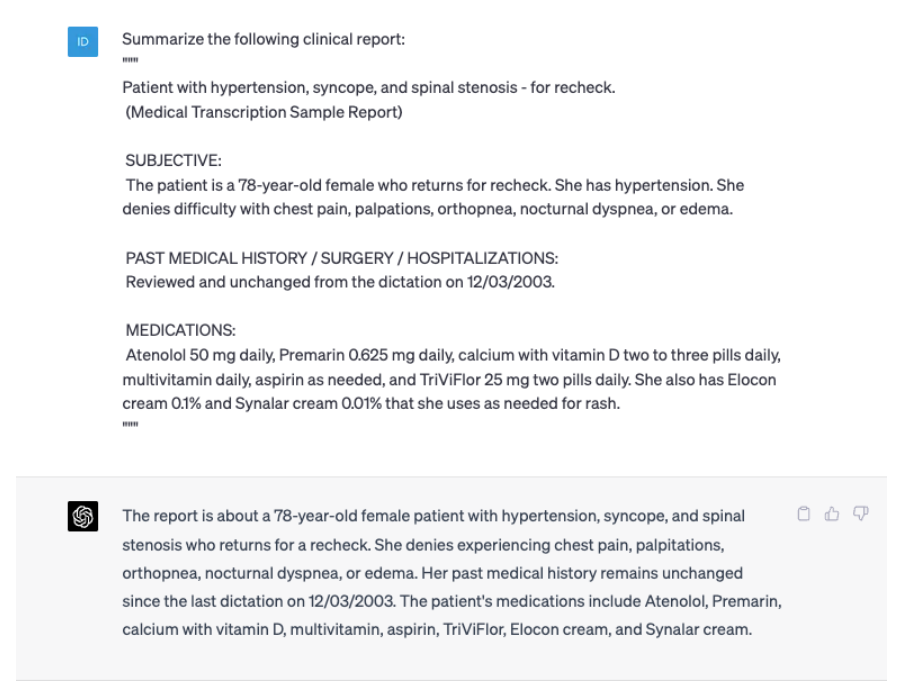

In [ ]:
clinical_summary_gpt4 = '''The report is about a 78-year-old female patient with hypertension, syncope, and spinal stenosis who returns for a recheck. She denies experiencing chest pain, palpitations, orthopnea, nocturnal dyspnea, or edema. Her past medical history remains unchanged since the last dictation on 12/03/2003. The patient's medications include Atenolol, Premarin, calcium with vitamin D, multivitamin, aspirin, TriViFlor, Elocon cream, and Synalar cream.'''
clinical_summary_gpt4

"The report is about a 78-year-old female patient with hypertension, syncope, and spinal stenosis who returns for a recheck. She denies experiencing chest pain, palpitations, orthopnea, nocturnal dyspnea, or edema. Her past medical history remains unchanged since the last dictation on 12/03/2003. The patient's medications include Atenolol, Premarin, calcium with vitamin D, multivitamin, aspirin, TriViFlor, Elocon cream, and Synalar cream."

In [ ]:
generate_scores(summary_dict['sparknlp_slim']['clinical_text'], clinical_summary_gpt4)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score Precision: 0.9549
BERT Score Recall: 0.8891
BERT Score F1: 0.9208


In [ ]:
generate_scores(summary_dict['sparknlp_aug']['clinical_text'], clinical_summary_gpt4)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score Precision: 0.9597
BERT Score Recall: 0.9311
BERT Score F1: 0.9452


In [ ]:
generate_scores(summary_dict['bart-large-cnn-samsum']['clinical_text'], clinical_summary_gpt4)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Score Precision: 0.8965
BERT Score Recall: 0.87
BERT Score F1: 0.883


# Other Summarization Models in Spark NLP for Healthcare

## 	summarizer_generic_jsl

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("documents")

med_summarizer = medical.Summarizer\
    .pretrained("summarizer_generic_jsl", 'en', 'clinical/models')\
    .setInputCols(["documents"])\
    .setMaxTextLength(1024)\
    .setMaxNewTokens(256)\
    .setOutputCol("summary")

pipeline = nlp.Pipeline(stages=[document_assembler, med_summarizer])

empty_data = spark.createDataFrame([['']]).toDF("text")

lp_pipeline = nlp.LightPipeline(pipeline.fit(empty_data))

summarizer_generic_jsl download started this may take some time.
[OK!]


In [ ]:
lp_pipeline.annotate(clinical_text)['summary'][0]

'The patient is 78 years old and has hypertension. She has a history of chest pain, palpations, orthopedics, and spinal stenosis. She has a prescription of Atenolol 50 mg daily, Premarin 0.625 mg daily, calcium with vitamin D two to three pills daily, multivitamin daily, aspirin, and TriViFlor 25 mg two pills daily.'

## summarizer_clinical_questions

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("documents")

med_summarizer = medical.Summarizer\
    .pretrained("summarizer_clinical_questions", 'en', 'clinical/models')\
    .setInputCols(["documents"])\
    .setMaxTextLength(1024)\
    .setMaxNewTokens(256)\
    .setOutputCol("summary")

pipeline = nlp.Pipeline(stages=[document_assembler, med_summarizer])

empty_data = spark.createDataFrame([['']]).toDF("text")

lp_pipeline = nlp.LightPipeline(pipeline.fit(empty_data))

summarizer_clinical_questions download started this may take some time.
[OK!]


In [ ]:
text = """
Hello,I'm 20 year old girl. I'm diagnosed with hyperthyroid 1 month ago. I was feeling weak, light headed,poor digestion, panic attacks, depression, left chest pain, increased heart rate, rapidly weight loss, from 4 months. Because of this, I stayed in the hospital and just discharged from hospital. I had many other blood tests, brain mri, ultrasound scan, endoscopy because of some dumb doctors bcs they were not able to diagnose actual problem. Finally I got an appointment with a homeopathy doctor finally he find that i was suffering from hyperthyroid and my TSH was 0.15 T3 and T4 is normal . Also i have b12 deficiency and vitamin D deficiency so I'm taking weekly supplement of vitamin D and 1000 mcg b12 daily. I'm taking homeopathy medicine for 40 days and took 2nd test after 30 days. My TSH is 0.5 now. I feel a little bit relief from weakness and depression but I'm facing with 2 new problem from last week that is breathtaking problem and very rapid heartrate. I just want to know if i should start allopathy medicine or homeopathy is okay? Bcs i heard that thyroid take time to start recover. So please let me know if both of medicines take same time. Because some of my friends advising me to start allopathy and never take a chance as i can develop some serious problems.Sorry for my poor english😐Thank you.
"""
text

"\nHello,I'm 20 year old girl. I'm diagnosed with hyperthyroid 1 month ago. I was feeling weak, light headed,poor digestion, panic attacks, depression, left chest pain, increased heart rate, rapidly weight loss, from 4 months. Because of this, I stayed in the hospital and just discharged from hospital. I had many other blood tests, brain mri, ultrasound scan, endoscopy because of some dumb doctors bcs they were not able to diagnose actual problem. Finally I got an appointment with a homeopathy doctor finally he find that i was suffering from hyperthyroid and my TSH was 0.15 T3 and T4 is normal . Also i have b12 deficiency and vitamin D deficiency so I'm taking weekly supplement of vitamin D and 1000 mcg b12 daily. I'm taking homeopathy medicine for 40 days and took 2nd test after 30 days. My TSH is 0.5 now. I feel a little bit relief from weakness and depression but I'm facing with 2 new problem from last week that is breathtaking problem and very rapid heartrate. I just want to know i

In [ ]:
lp_pipeline.annotate(text)['summary'][0]


'What are the treatments for hyperthyroidism?'

## summarizer_biomedical_pubmed

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("documents")

med_summarizer = medical.Summarizer\
    .pretrained("summarizer_biomedical_pubmed", 'en', 'clinical/models')\
    .setInputCols(["documents"])\
    .setMaxTextLength(1024)\
    .setMaxNewTokens(256)\
    .setOutputCol("summary")

pipeline = nlp.Pipeline(stages=[document_assembler, med_summarizer])

empty_data = spark.createDataFrame([['']]).toDF("text")

lp_pipeline = nlp.LightPipeline(pipeline.fit(empty_data))

summarizer_biomedical_pubmed download started this may take some time.
[OK!]


In [ ]:
text = """Residual disease after initial surgery for ovarian cancer is the strongest prognostic factor for survival. However, the extent of surgical resection required to achieve optimal cytoreduction is controversial. Our goal was to estimate the effect of aggressive surgical resection on ovarian cancer patient survival.\\n A retrospective cohort study of consecutive patients with International Federation of Gynecology and Obstetrics stage IIIC ovarian cancer undergoing primary surgery was conducted between January 1, 1994, and December 31, 1998. The main outcome measures were residual disease after cytoreduction, frequency of radical surgical resection, and 5-year disease-specific survival.\\n The study comprised 194 patients, including 144 with carcinomatosis. The mean patient age and follow-up time were 64.4 and 3.5 years, respectively. After surgery, 131 (67.5%) of the 194 patients had less than 1 cm of residual disease (definition of optimal cytoreduction). Considering all patients, residual disease was the only independent predictor of survival; the need to perform radical procedures to achieve optimal cytoreduction was not associated with a decrease in survival. For the subgroup of patients with carcinomatosis, residual disease and the performance of radical surgical procedures were the only independent predictors. Disease-specific survival was markedly improved for patients with carcinomatosis operated on by surgeons who most frequently used radical procedures compared with those least likely to use radical procedures (44% versus 17%, P < .001).\\n Overall, residual disease was the only independent predictor of survival. Minimizing residual disease through aggressive surgical resection was beneficial, especially in patients with carcinomatosis."""

text

'Residual disease after initial surgery for ovarian cancer is the strongest prognostic factor for survival. However, the extent of surgical resection required to achieve optimal cytoreduction is controversial. Our goal was to estimate the effect of aggressive surgical resection on ovarian cancer patient survival.\\n A retrospective cohort study of consecutive patients with International Federation of Gynecology and Obstetrics stage IIIC ovarian cancer undergoing primary surgery was conducted between January 1, 1994, and December 31, 1998. The main outcome measures were residual disease after cytoreduction, frequency of radical surgical resection, and 5-year disease-specific survival.\\n The study comprised 194 patients, including 144 with carcinomatosis. The mean patient age and follow-up time were 64.4 and 3.5 years, respectively. After surgery, 131 (67.5%) of the 194 patients had less than 1 cm of residual disease (definition of optimal cytoreduction). Considering all patients, resid

In [ ]:
lp_pipeline.annotate(text)['summary'][0]


'The results of this review suggest that aggressive ovarian cancer surgery is associated with a significant reduction in the risk of recurrence and a reduction in the number of radical versus conservative surgical resections. However, the results of this review are based on only one small trial. Further research is needed to determine the role of aggressive ovarian cancer surgery in women with stage IIIC ovarian cancer.'